<a href="https://colab.research.google.com/github/priyanka-senthil/Mapping-the-Landscape-of-Generative-AI-Research-through-Web-of-Science/blob/main/Mapping_the_Landscape_of_Generative_AI_Research_through_Web_of_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mapping the Landscape of Generative AI Research through Web of Science**

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Set working directory
%cd /content/drive/MyDrive/Project 3/excel files/

/content/drive/MyDrive/Project 3/excel files


In [63]:
# Include libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import math
import os
import warnings
import glob
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import networkx as nx

# Ignore all warnings
warnings.filterwarnings("ignore")

In [64]:
# Define the path where Excel files are located
path = "/content/drive/MyDrive/Project 3/excel files"

# Use glob to get a list of all Excel files in the specified path
all_files = glob.glob(path + "/*.xls")

# Initialize an empty list to store DataFrames read from each Excel file
li = []

# Loop through each Excel file
for filename in all_files:
    # Read the Excel file into a DataFrame
    df = pd.read_excel(filename, index_col=None, header=0)
    # Append the DataFrame to the list
    li.append(df)

# Concatenate all DataFrames in the list along the rows (axis=0)
# to create a single DataFrame containing data from all Excel files
df = pd.concat(li, axis=0, ignore_index=True)

In [65]:
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Sachan, S; Liu, X",NaN,NaN,NaN,"Sachan, Swati; Liu (Lisa), Xi",NaN,NaN,Blockchain-based auditing of legal decisions s...,ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Legal; Law; Explainable AI; Blockchain; Genera...,EVIDENTIAL REASONING APPROACH; SCHEME; SECURE;...,Generative AI tools powered by Large Language ...,"[Sachan, Swati] Univ Liverpool, Management Sch...",University of Liverpool,"Sachan, S (corresponding author), Univ Liverpo...",Swati.Sachan@liverpool.ac.uk; Lisa.Liu@kennedy...,NaN,"Sachan, Dr. Swati/0000-0003-0136-0553",University of Liverpool [106897],University of Liverpool,We are grateful to the four anonymous reviewer...,NaN,91,0,0,23,23,PERGAMON-ELSEVIER SCIENCE LTD,OXFORD,"THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...",0952-1976,1873-6769,NaN,ENG APPL ARTIF INTEL,Eng. Appl. Artif. Intell.,MAR,2024,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107666,10.1016/j.engappai.2023.107666,0.0,NaN,DEC 2023,25,Automation & Control Systems; Computer Science...,Science Citation Index Expanded (SCI-EXPANDED),Automation & Control Systems; Computer Science...,DZ9O6,NaN,NaN,NaN,NaN,2024-04-12,WOS:001136038900001,0
1,J,"Ferrari, F; van Dijck, J; van den Bosch, A",NaN,NaN,NaN,"Ferrari, Fabian; van Dijck, Jose; van den Bosc...",NaN,NaN,"Observe, inspect, modify: Three conditions for...",NEW MEDIA & SOCIETY,NaN,NaN,English,Article; Early Access,NaN,NaN,NaN,NaN,NaN,AI governance; AI regulation; generative AI; g...,NaN,In a world increasingly shaped by generative A...,"[Ferrari, Fabian; van Dijck, Jose; van den Bos...",Utrecht University; Utrecht University,"Ferrari, F (corresponding author), Univ Utrech...",f.l.ferrari@uu.nl,NaN,"Ferrari, Fabian/0000-0003-0637-0232; van den B...",Spinoza program of the Dutch Research Council ...,Spinoza program of the Dutch Research Council ...,The author(s) disclosed receipt of the followi...,NaN,41,0,0,107,107,SAGE PUBLICATIONS LTD,LONDON,"1 OLIVERS YARD, 55 CITY ROAD, LONDON EC1Y 1SP,...",1461-4448,1461-7315,NaN,NEW MEDIA SOC,New Media Soc.,2023 NOV 29,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1177/14614448231214811,0.0,NaN,NOV 2023,19,Communication,Social Science Citation Index (SSCI),Communication,Z3KI4,NaN,hybrid,NaN,NaN,2024-04-12,WOS:001111091300001,0
2,J,"Agrawal, K",NaN,NaN,NaN,"Agrawal, Kalyan Prasad",NaN,NaN,Towards Adoption of Generative AI in Organizat...,JOURNAL OF COMPUTER INFORMATION SYSTEMS,NaN,NaN,English,Article; Early Access,NaN,NaN,NaN,NaN,NaN,Generative AI; innovation diffusion; TOE frame...,INFORMATION-TECHNOLOGY; COMPETITIVE ADVANTAGE;...,"As an emerging technology, Generative Artifici...","[Agrawal, Kalyan Prasad] Chandragupt Inst Mana...",NaN,"Agrawal, K (corresponding author), Chandragupt...",kalyan@cimp.ac.in,NaN,NaN,NaN,NaN,NaN,NaN,48,4,4,209,263,TAYLOR & FRANCIS INC,PHILADELPHIA,"530 WALNUT STREET, STE 850, PHILADELPHIA, PA 1...",0887-4417,2380-2057

In [66]:
df.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [67]:
#Selecting the required columns
df = df[['Article Title','Author Keywords']]
df.head()

,Article Title,Author Keywords
0,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
1,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
2,Towards Adoption of Generative AI in Organizat...,Generative AI; innovation diffusion; TOE frame...
3,Generative AI in mobile networks: a survey,Generative AI; Telecom; 6 G; 5 G; Survey; Appl...
4,"Generative AI: Here to stay, but for good?",Generative AI; Large language models; Generati...


#**Data Preprocessing**

In [68]:
# Removing Null values
df = df.dropna()
df

,Article Title,Author Keywords
0,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
1,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
2,Towards Adoption of Generative AI in Organizat...,Generative AI; innovation diffusion; TOE frame...
3,Generative AI in mobile networks: a survey,Generative AI; Telecom; 6 G; 5 G; Survey; Appl...
4,"Generative AI: Here to stay, but for good?",Generative AI; Large language models; Generati...
...,...,...
1441,Web-Based Content on Diet and Nutrition Writte...,diet; nutrition; information; internet; web; J...
1443,mHealth Intervention to Promote Physical Activ...,eHealth; behavioral change; mobile phone; smar...
1444,"Big Data, Proxies, Algorithmic Decision-Making...",algorithms; big data; corporate empiricism; pe...
1445,A survey on deep learning for skin lesion segm...,Skin lesion; Deep learning; Segmentation; Survey


In [69]:
# Drop Duplicates
df = df.drop_duplicates()
df

,Article Title,Author Keywords
0,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
1,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
2,Towards Adoption of Generative AI in Organizat...,Generative AI; innovation diffusion; TOE frame...
3,Generative AI in mobile networks: a survey,Generative AI; Telecom; 6 G; 5 G; Survey; Appl...
4,"Generative AI: Here to stay, but for good?",Generative AI; Large language models; Generati...
...,...,...
1441,Web-Based Content on Diet and Nutrition Writte...,diet; nutrition; information; internet; web; J...
1443,mHealth Intervention to Promote Physical Activ...,eHealth; behavioral change; mobile phone; smar...
1444,"Big Data, Proxies, Algorithmic Decision-Making...",algorithms; big data; corporate empiricism; pe...
1445,A survey on deep learning for skin lesion segm...,Skin lesion; Deep learning; Segmentation; Survey


In [70]:
# Add a new column 'Unique Article No' containing unique numbers starting from 1
df['Unique Article No'] = range(1, len(df) + 1)

# Select only the specified columns: 'Unique Article No', 'Article Title', 'Author Keywords'
# Reassign the modified DataFrame to 'df'
df = df[['Unique Article No', 'Article Title', 'Author Keywords']]

# Display the first few rows of the DataFrame
df.head()

,Unique Article No,Article Title,Author Keywords
0,1,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
1,2,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
2,3,Towards Adoption of Generative AI in Organizat...,Generative AI; innovation diffusion; TOE frame...
3,4,Generative AI in mobile networks: a survey,Generative AI; Telecom; 6 G; 5 G; Survey; Appl...
4,5,"Generative AI: Here to stay, but for good?",Generative AI; Large language models; Generati...


In [71]:
# Split the strings in the 'Author Keywords' column at ';' delimiter and create lists of keywords
df['Author Keywords'] = df['Author Keywords'].str.split(';')

# Expand the lists of keywords into separate rows, ensuring each row contains only one keyword
df = df.explode('Author Keywords')

# Reset the index of the DataFrame to ensure consecutive indices
df = df.reset_index(drop=True)


,Unique Article No,Article Title,Author Keywords
0,1,Blockchain-based auditing of legal decisions s...,Legal
1,1,Blockchain-based auditing of legal decisions s...,Law
2,1,Blockchain-based auditing of legal decisions s...,Explainable AI
3,1,Blockchain-based auditing of legal decisions s...,Blockchain
4,1,Blockchain-based auditing of legal decisions s...,Generative AI
...,...,...,...
6080,980,"Myo-inositol alters the effects of glucose, le...",fatty acid
6081,980,"Myo-inositol alters the effects of glucose, le...",fetal sex
6082,980,"Myo-inositol alters the effects of glucose, le...",gestational diabetes
6083,980,"Myo-inositol alters the effects of glucose, le...",stable isotope


In [114]:
# Download NLTK stop words
nltk.download('stopwords')

# Function to remove stop words and parentheses
def clean_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    cleaned_text = re.sub(r'\([^)]*\)', '', cleaned_text).strip()  # Remove parentheses and their contents
    return cleaned_text

# Apply clean_keywords function to 'Author Keywords' column
df['Author Keywords'] = df['Author Keywords'].apply(clean_keywords)

# Printing the unique cleaned keywords
unique_keywords = df['Author Keywords'].unique()
print(unique_keywords.tolist())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['legal', 'law', 'explainable ai', 'blockchain', 'generative ai', 'responsible ai', 'ai governance', 'ai regulation', 'generative models', 'inspectability', 'large language models', 'modifiability', 'observability', 'regulatory objects', 'innovation diffusion', 'toe framework', 'telecom', '6 g', '5 g', 'survey', 'application', 'generative adversarial networks', 'harms', 'power', 'inequality', 'chatgpt', 'pedagogical agents', 'socratic tutors', 'simulations', 'legal regulation', 'ethical principle', 'algorithm', 'data protection', 'generative ai ,', 'genai', 'learning analytics', 'research', 'practice', 'marketing education', 'qualitative research', 'interpretative methods', 'new methodology', 'interdependencies', 'interaction', 'o-ring', 'matching', 'ai risks', 'optimization intelligence', 'normalization process theory', 'ai ethics', 'ai social impacts', 'foundation models', 'multimodal generative ai', 'affordances multimodal generative ai', 'dall center dot e 2', 'dall center dot e.3'

In [115]:
len(unique_keywords)

3417

In [73]:
df

,Unique Article No,Article Title,Author Keywords
0,1,Blockchain-based auditing of legal decisions s...,Legal
1,1,Blockchain-based auditing of legal decisions s...,Law
2,1,Blockchain-based auditing of legal decisions s...,Explainable AI
3,1,Blockchain-based auditing of legal decisions s...,Blockchain
4,1,Blockchain-based auditing of legal decisions s...,Generative AI
...,...,...,...
6080,980,"Myo-inositol alters the effects of glucose, le...",fatty acid
6081,980,"Myo-inositol alters the effects of glucose, le...",fetal sex
6082,980,"Myo-inositol alters the effects of glucose, le...",gestational diabetes
6083,980,"Myo-inositol alters the effects of glucose, le...",stable isotope


#**Co-occurrence Analysis for Article Titles and Author Keywords**

This below code conducts co-occurrence analysis between article titles and author keywords in a DataFrame. Here are the key points:

1. **Text Normalization**: Text is normalized to lowercase to ensure consistency in comparisons.

2. **Unique Identification**: Unique keywords and article titles are extracted from the dataset to minimize redundancy.

3. **Co-occurrence Matrix Creation**: An empty matrix is initialized to capture relationships between titles and keywords.

4. **Co-occurrence Calculation**: The code calculates the frequency of co-occurrences between article titles and keywords, populating the matrix.

5. **Structured Representation**: The co-occurrence matrix is converted into a DataFrame, facilitating further analysis and visualization of patterns.

This analysis helps identify prevalent themes or topics across articles based on the frequency of co-occurrence between titles and keywords.


In [116]:
# Lowercase normalization
df['Article Title'] = df['Article Title'].str.lower()
df['Author Keywords'] = df['Author Keywords'].str.lower()

# Extract unique keywords and article titles
unique_keywords = df['Author Keywords'].str.split(', ').explode().unique()
unique_titles = df['Article Title'].unique()

# Create an empty co-occurrence matrix
co_occurrence_matrix = np.zeros((len(unique_titles), len(unique_keywords)), dtype=int)

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    title = row['Article Title']
    keywords = row['Author Keywords'].split(', ')
    title_index = np.where(unique_titles == title)[0][0]
    for keyword in keywords:
        keyword_index = np.where(unique_keywords == keyword)[0][0]
        co_occurrence_matrix[title_index, keyword_index] += 1

# Convert the co-occurrence matrix to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=unique_titles, columns=unique_keywords)

In [111]:
co_occurrence_df.head(20)

,legal,law,explainable ai,blockchain,generative ai,responsible ai,ai governance,ai regulation,generative models,inspectability,large language models,modifiability,observability,regulatory objects,innovation diffusion,toe framework,telecom,6 g,5 g,survey,application,generative adversarial networks,harms,power,inequality,chatgpt,pedagogical agents,socratic tutors,simulations,legal regulation,ethical principle,algorithm,data protection,"generative ai ,",genai,learning analytics,research,practice,marketing education,qualitative research,interpretative methods,new methodology,interdependencies,interaction,o-ring,matching,ai risks,optimization intelligence,normalization process theory,ai ethics,ai social impacts,foundation models,multimodal generative ai,affordances multimodal generative ai,dall center dot e 2,dall center dot e.3,fine-tuned prompt literacy,education,ai opinions,use ai,gpt-4,ai integration,tools,technology,ai empire,critical ai,intersectionality,algorithmic oppression,data colonialism,ai,game design,midjourney,novel ai,self-assessment,self-directed learning,quizizz ai,image-generative ai,art-focused steam education,prompt,natural language processing,sentiment analysis,practical applications,tourism,planning,decision-making,trust science,metascience,gpt,experiment,authentic assessment,bloom 's taxonomy,ai tertiary education,quantitative,case study,educative ai,idee framework,ai literacy,steam education,elementary school,design-based research,network analysis,artificial intelligence,fourth industrial revolution,developing countries,technological change,disruptive technology,artificial intelligence ( ai ),large language models ( llm ),business models,content generation,machine learning,systematic literature mapping,copyright,creativity,originality,data,feist,david guetta,input,output,authorship,intellectual property,algorithm aversion,human favortism,consumer perception,school education,learning,school children,cognitive ergonomics,spanish,history,sustainable development,inclusion,academic integrity,academic writing pedagogy,generative artificial intelligence,training data,civil liability,advertising,computer vision,machine vision,business intelligence,automation,digital advertising campaign,digital marketing,generative ai ( gai ),large language model,few-shot learning,prompt engineering,ai chatbot .,text-to-image genera-tive models,k-12,prompt crafting,conversational agent,ai-assisted writing,ai-mediated communication,productivity,industries,auditory system,chatbots,software,software engineering,co-creation ai,aied,open educational resources ( oer ),open educational practices ( oep ),ethics,mental health,bard,critical analysis,dall-e,future education,google,educator,management education,management educator,openai,paradox,paradox theory,ragnarok,reformation,transformation,transformative education,news media market,online advertising,clickbait,fake news,student perception,risks,advantages,holistic competencies,medicare improper payments,provider types hcpc codes,medicare expenditure reduction,communication,undergraduates,chat gpt,transmedia skills,engineered cementitious composite,performance-based design,tensile performance,polyethylene fiber,hospitality,big data,open source,creative destruction,entrepreneurship,operational data,l1,l2,m13,o3,text data mining,freedom expression,art autonomy,reservation rights,three-step test,domaine public payant,equitable remuneration,levy system,collective rights management,de novo molecule design,deep learning,virtual screening,compound quality control,generative conversational ai agent,information quality,novelty seeking,ethical concerns,decision-making efficiency,innovation performance,medical ethics training,principlism,cognitive process,digital multimodal composing,writing,cyber attacks,large language model ( llm ),military planning,propaganda,surveillance,gender bias,algorithm auditing,higher education,university transformation,digital services act ( dsa ),topic modelling,public 

#**Co-occurrence Network Analysis for Author Keywords**

The below code facilitates the analysis of co-occurrence patterns among author keywords extracted from the dataset. The script processes a list of unique author keywords, tokenizes them into individual words, and constructs a co-occurrence network to visualize the relationships between these words.

## Usage

1. **Tokenization**: The author keywords are tokenized into lists of individual words using the `split()` method.
   
2. **Building Co-occurrence Network**: The NetworkX library is utilized to construct a co-occurrence network, where each word represents a node, and the co-occurrence of words within the same keyword list defines the edges between nodes.

3. **Visualization**: The resulting co-occurrence network is visualized using matplotlib, with the width of edges scaled by their weights. This enables the exploration of thematic connections and frequent co-occurrences among keywords.

4. **Edge Data**: The script also generates a DataFrame containing information about the edges, including the source node, target node, and edge weight (representing the frequency of co-occurrence).

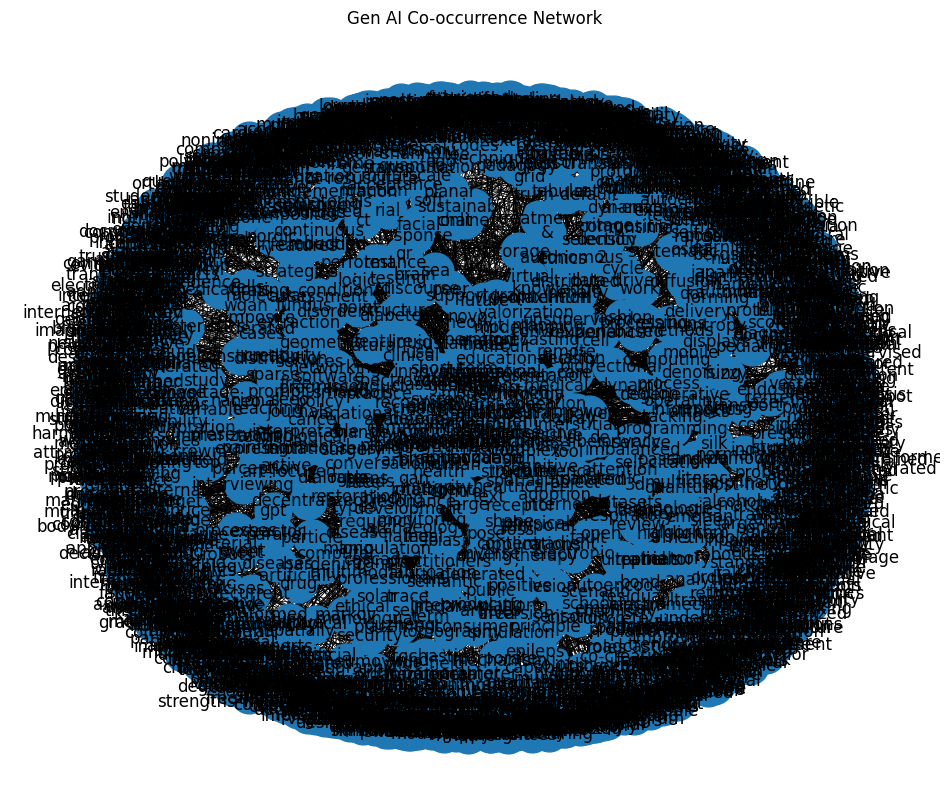

In [117]:
tokenized_lists = [list_.split() for list_ in unique_keywords]

# Build co-occurrence network
G = nx.Graph()

for list_ in tokenized_lists:
    for item1, item2 in itertools.combinations(set(list_), 2):
        if G.has_edge(item1, item2):
            G[item1][item2]['weight'] += 1
        else:
            G.add_edge(item1, item2, weight=1)

# Visualization with weighted edges
plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scale edge widths by weight
var = nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width)
# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Gen AI Co-occurrence Network")
plt.axis('off')
plt.show()

edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)

In [133]:
edges_df_sorted.head(25)

,Source,Target,Weight
125,intelligence,artificial,33
22,generative,adversarial,21
80,learning,machine,14
27,generative,network,13
21,generative,networks,10
81,learning,deep,10
120,adversarial,network,10
134,network,neural,10
34,generative,model,10
32,generative,transformer,10


#**Insights from Co-occurrence Network Analysis of Author Keywords**

## Common Themes and Topics

- **Artificial Intelligence**: Keywords like 'intelligence' and 'artificial' frequently co-occur with a weight of 33, suggesting a prevalent theme of artificial intelligence in the dataset.
- **Generative Adversarial Networks (GANs)**: The high weight of 21 associated with the pair 'generative' and 'adversarial' indicates a strong focus on GANs or related topics.
- **Machine Learning**: 'Learning' and 'machine' co-occur frequently with a weight of 14, highlighting the prominence of machine learning topics.

## Technological and Scientific Trends

- **Neural Networks**: The pair 'network' and 'neural' with a weight of 10 suggests significant attention to neural networks within the dataset.
- **Deep Learning**: 'Learning' and 'deep' co-occur with a weight of 10, indicating a focus on deep learning methodologies.
- **Healthcare and Medical Imaging**: Pairs like 'medical' and 'image', 'digital' and 'health', and 'mental' and 'health' suggest a focus on healthcare and medical imaging applications.

## Prevalent Concepts and Methods

- **Generative Models**: 'Generative' co-occurs frequently with 'model' and 'transformer', indicating a focus on generative models and transformer architectures.
- **Network Architectures**: Pairs like 'networks' and 'adversarial' and 'networks' and 'neural' suggest a focus on adversarial networks and neural networks within network architectures.

## Emerging Fields and Applications

- **Time Series Analysis**: The pair 'time' and 'series' indicates a focus on time series analysis, which is crucial in various domains such as finance and signal processing.
- **Image Generation and Synthesis**: 'Image' and 'synthesis' and 'generation' and 'image' suggest a focus on image generation and synthesis techniques, important in computer vision and graphics.

This analysis provides valuable insights into the prevalent themes, trends, concepts, and applications within the dataset, helping to understand its underlying structure and content better.


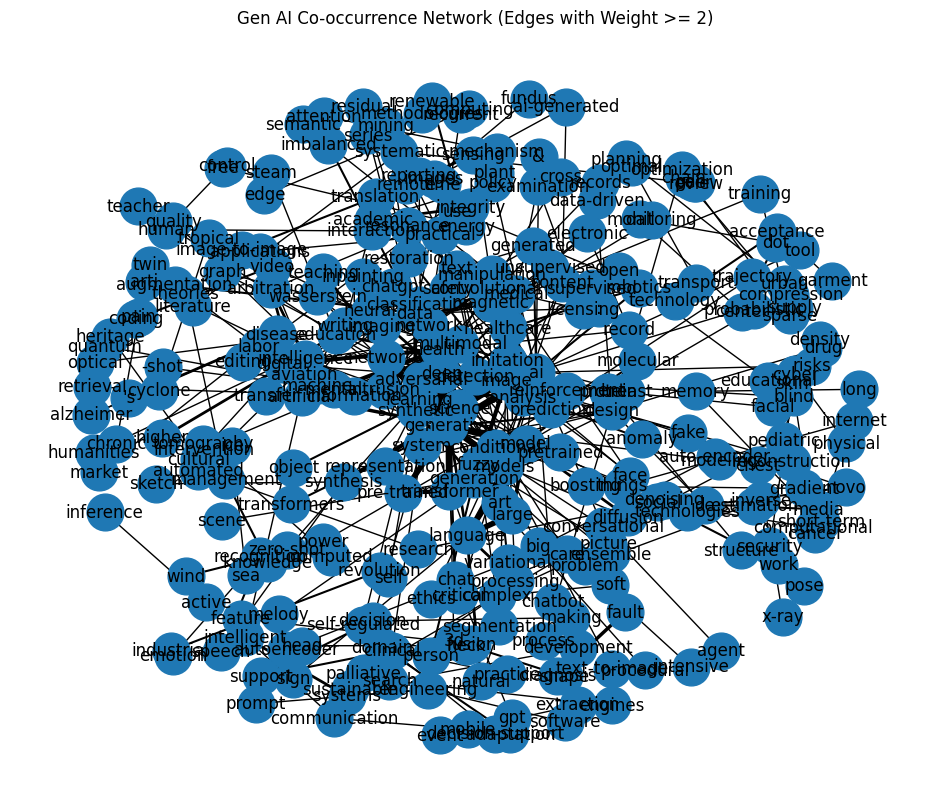

In [130]:
# Visualization with weighted edges
plt.figure(figsize=(12, 10))

# Filter edges with weight greater than 5
edges_to_keep = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= 2]
G_filtered = nx.Graph(edges_to_keep)

pos = nx.spring_layout(G_filtered, k=0.5)

# Nodes
nx.draw_networkx_nodes(G_filtered, pos, node_size=700)

# Edges
edges = G_filtered.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scale edge widths by weight
nx.draw_networkx_edges(G_filtered, pos, edgelist=edges, width=edge_width)

# Labels
nx.draw_networkx_labels(G_filtered, pos, font_size=12)

plt.title("Gen AI Co-occurrence Network (Edges with Weight >= 2)")
plt.axis('off')
plt.show()

edges_data = [(u, v, d['weight']) for u, v, d in G_filtered.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)

In [131]:
edges_df_sorted

,Source,Target,Weight
125,intelligence,artificial,33
22,generative,adversarial,21
80,learning,machine,14
27,generative,network,13
21,generative,networks,10
81,learning,deep,10
120,adversarial,network,10
134,network,neural,10
34,generative,model,10
32,generative,transformer,10


In [ ]:
# Visualization with weighted edges
plt.figure(figsize=(12, 10))

# Filter edges with weight greater than 5
edges_to_keep = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= 2]
G_filtered = nx.Graph(edges_to_keep)

pos = nx.spring_layout(G_filtered, k=0.5)

# Nodes
nx.draw_networkx_nodes(G_filtered, pos, node_size=700)

# Edges
edges = G_filtered.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scale edge widths by weight
nx.draw_networkx_edges(G_filtered, pos, edgelist=edges, width=edge_width)

# Labels
nx.draw_networkx_labels(G_filtered, pos, font_size=12)

plt.title("Gen AI Co-occurrence Network (Edges with Weight >= 2)")
plt.axis('off')
plt.show()

edges_data = [(u, v, d['weight']) for u, v, d in G_filtered.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)